## ROD PUMP FAILURE EXPLORATORY DATA ANALYSIS
not done yet, but planning on consolidating all "EDA" into one file, as there are multiple files with similar code that all say the same thing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the cleaned data
df = pd.read_csv('../data/rod_cleaned_final.csv')

### PROBLEM:

    - What production and mechanical parameters are the leading predictors for rod pump failure/downtime?
    - What is best design to mitigate failures in different conditions?
#### Objectives:

    - Identifying Risk Factors for Rod Pump Failure
    - Predicting well production and optimizing new well location

approach: EDA (exploratory data analysis)

    -   explore data to understand distribution and relationships of variables
    -   look for correleation matrices, pair plots, and other visualization techniques to see how different variables relate to pump failures.

approach : feature selection

    -   statistical tests and models to select features that significantly impcat pump failure.
    -   techniques like logistic regression for binary classification of failure vs. non-failure can help key predictors

approach: model building

    -   build predictive model to quantify relationship between pump parameters and failure likelihood.
    -   decision trees / random forests / gradient boosting machines

## EDA

In [2]:
# creating new dataframes to visualize distributions for each type of data
df_numeric = df.select_dtypes(include = 'number')
df_bool = df.select_dtypes(include = 'bool')
df_cat = df.select_dtypes(include = 'object')
df_id = pd.DataFrame()
for col in df_cat.columns:
    if len(df_cat[col].unique()) >= 10:
        df_id[col] = df_cat.pop(col) # leave out identifier columns and add to df_id

#### Numerical Distributions

In [3]:
# statistics of numerical columns
df_numeric.describe()

,gross_stroke_len,gas_anchor_len,avg_press_flowline,avg_press_tubing,avg_press_casing,avg_diff_press,avg_liquid_vol,route,overall_max_sideload,shallow_max_sideload,...,avg_water_vol_log,avg_watersg_log,enduralloy_len_log,nip_set_depth_log,bha_lifetime_log,press_ratio_log,oil_liquid_ratio_log,stroke_len_sq_log,avg_press_tubing_sq_log,avg_diff_press_sq_log
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,...,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,128.432358,17.332711,58.689172,78.001783,100.534755,22.037457,114.124262,883.195245,164.495625,152.288761,...,3.227936,0.724118,0.966005,9.195734,5.816769,0.610408,0.524618,9.944156,8.251073,5.852361
std,10.674510,6.886553,6.970744,33.539087,56.362302,47.132980,68.965431,11.627324,63.370389,66.339050,...,0.967842,0.026219,2.063513,0.051817,0.974115,0.319340,0.098937,0.008283,2.017258,2.703231
min,109.249383,0.000000,44.145113,0.000000,0.000000,-133.228975,0.000000,867.000000,0.000000,0.000000,...,0.000000,0.712950,0.000000,8.984844,2.079442,0.000000,0.000000,9.939675,0.000000,0.000000
25%,124.033352,17.130000,56.796010,62.205696,66.310588,-1.106538,63.675496,874.000000,127.980000,111.350000,...,2.695855,0.712950,0.000000,9.174164,5.288267,0.471638,0.476240,9.939675,8.261152,4.409442
50%,128.993368,19.210000,59.722385,76.564103,91.608571,14.677138,104.958180,882.000000,172.605000,158.960000,...,3.410691,0.712950,0.000000,9.203114,5.908083,0.594065,0.540195,9.939675,8.676427,6.309457
75%,129.592593,20.690000,61.872152,94.945176,126.763696,43.557801,150.640228,886.000000,179.240000,170.680000,...,3.902621,0.712950,0.000000,9.232288,6.466145,0.703359,0.593582,9.942450,9.106710,7.884571
max,147.716810,40.500000,69.062476,203.846941,328.341473,188.890061,409.209092,905.000000,375.000000,375.000000,...,5.069965,0.788457,7.352723,9.307376,8.265136,5.786971,0.693147,9.960399,10.634763,10.482358


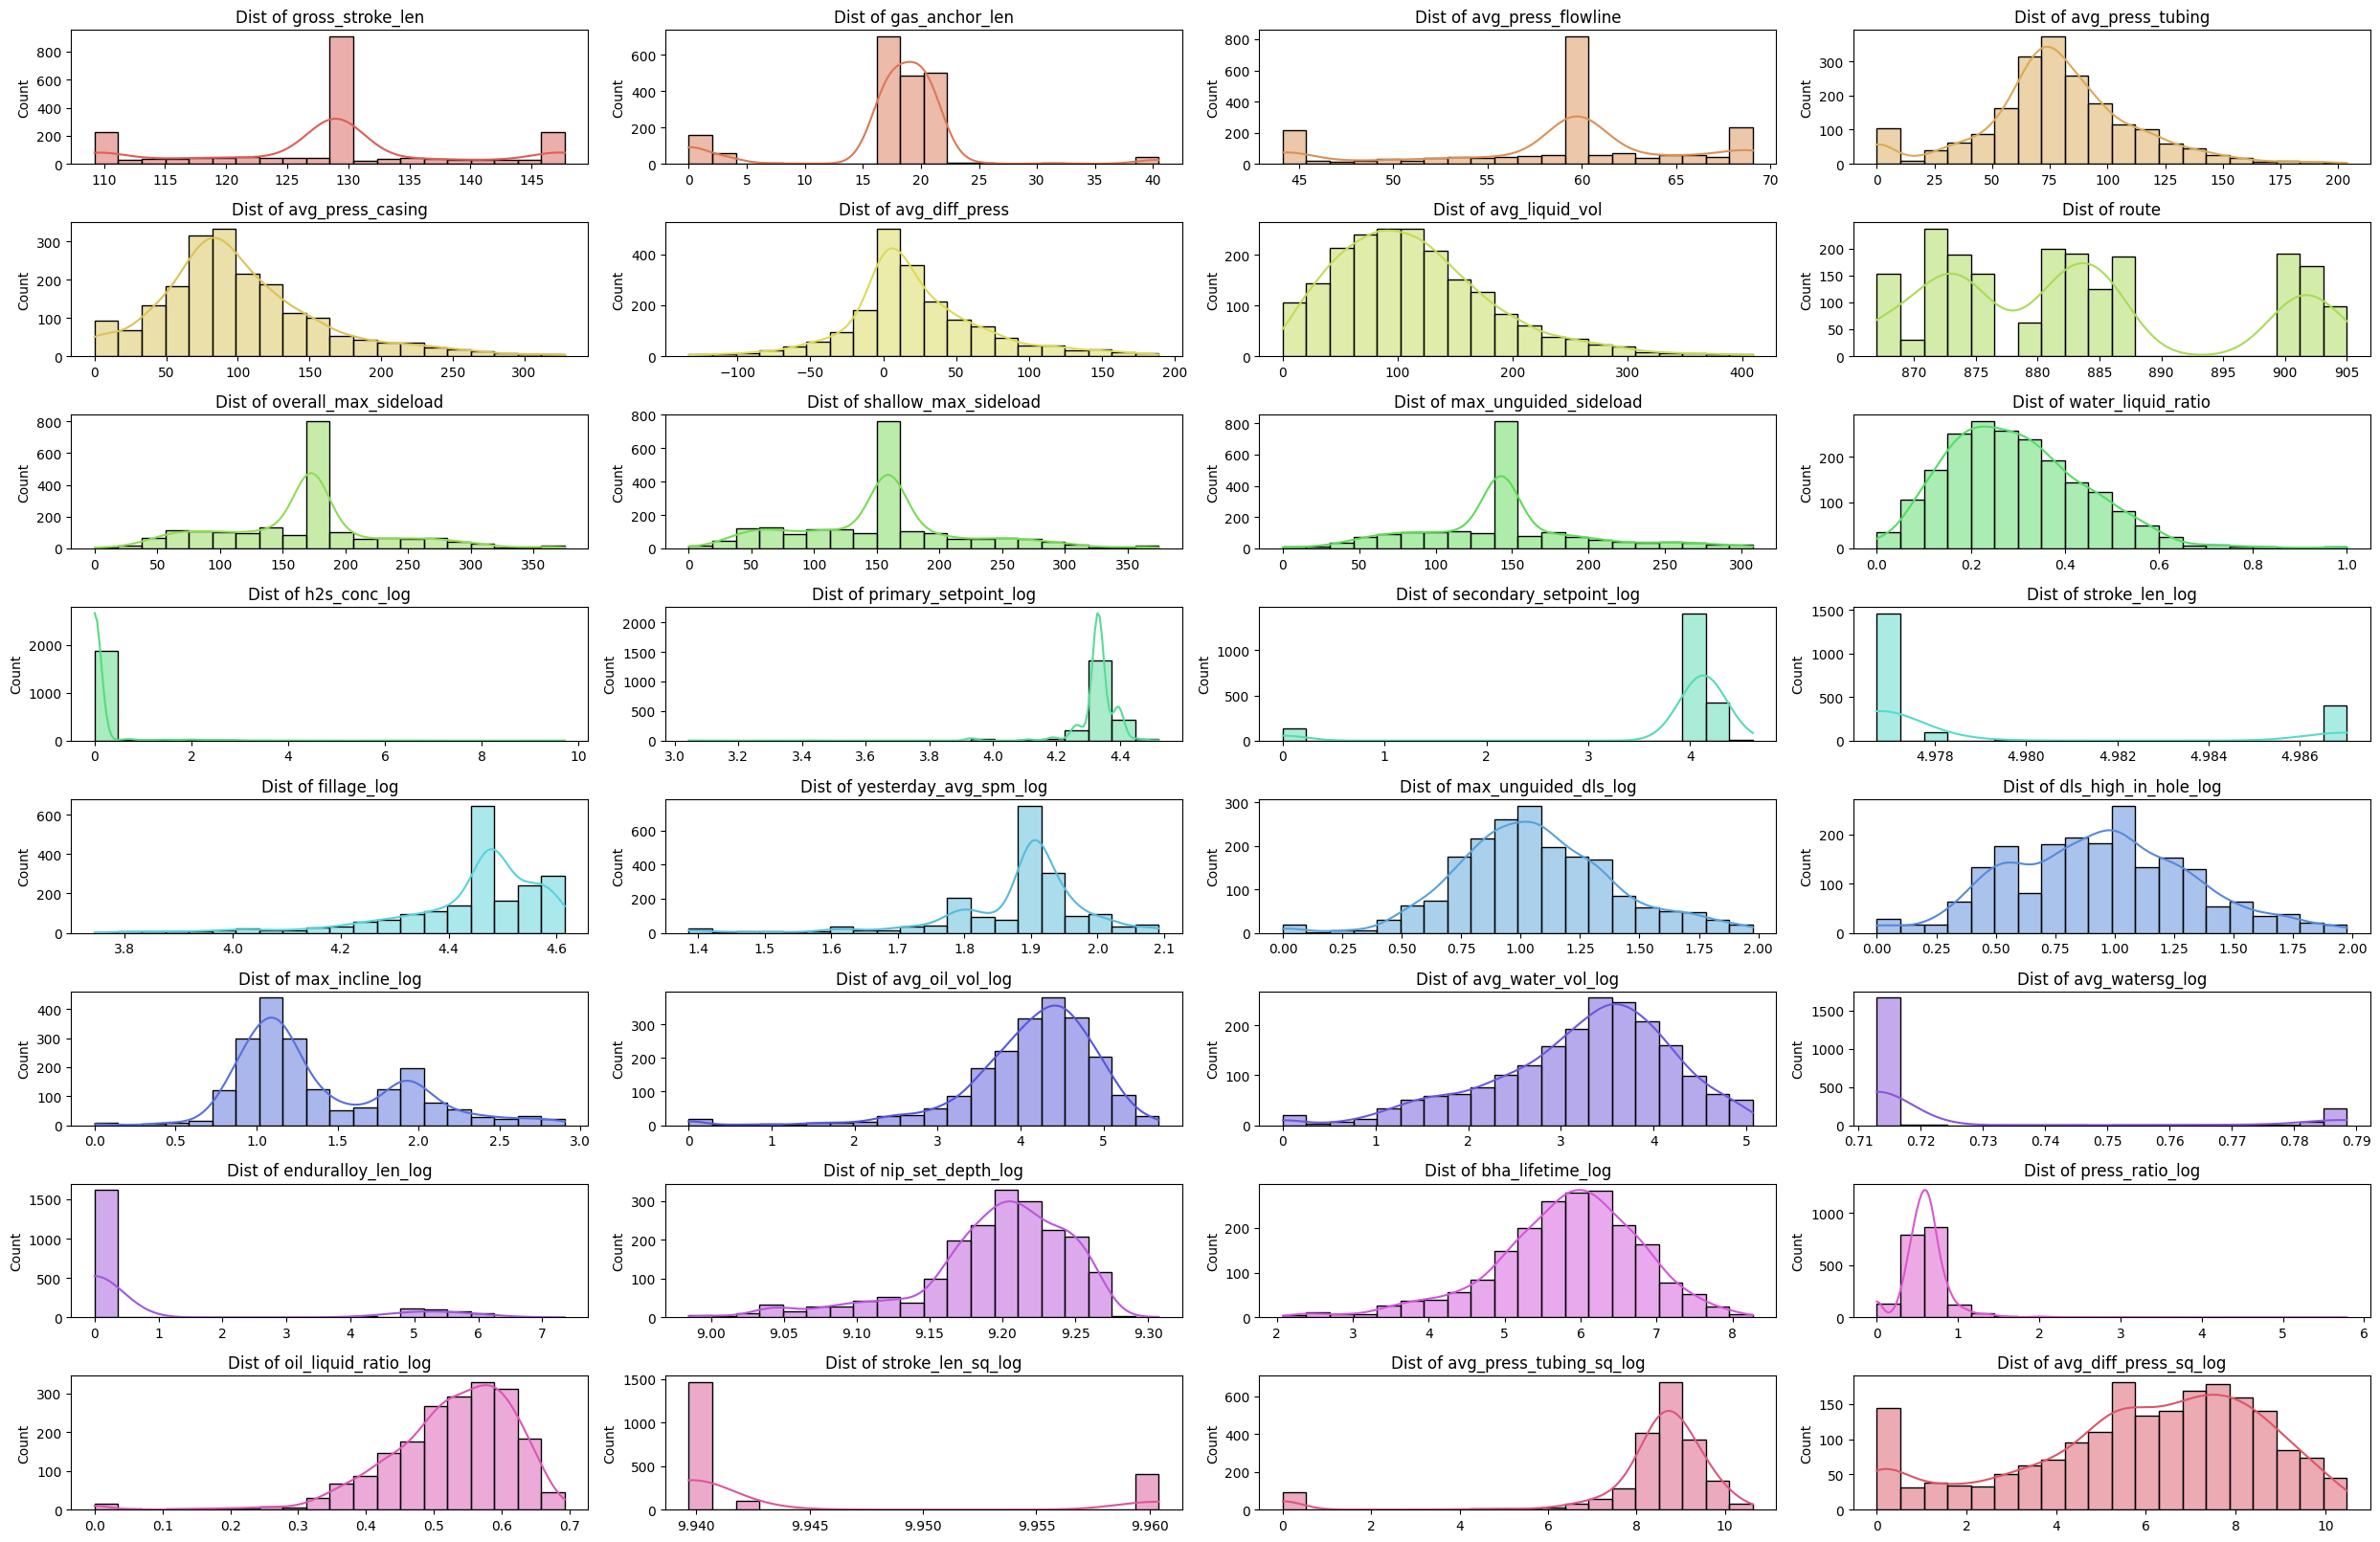

In [4]:
# Set up plot with subplots
fig, axes = plt.subplots(10, 4, figsize=(25, 20))
axes = axes.flatten()

# Set a color palette
palette = sns.color_palette("hls", len(df_numeric.columns))

# Create histograms for each numeric column excluding "_log"
for i, col in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[col], kde=True, ax=axes[i], bins=20, color=palette[i])
    axes[i].set_title(f'Dist of {col}', fontsize=12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].set_xlabel('', fontsize=1)
    axes[i].set_ylabel('Count', fontsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Categorical Distributions

In [5]:
# statistics of categorical variables
df_cat.describe()

,failure_type,bha_config,wellbore_category,packer_vs_tac,rod_sinker_type,rod_make,rod_apigrade,dsand_dgas_type,pump_bore,gas_anchor_od
count,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977
unique,6,5,4,5,4,7,6,6,5,4
top,Tubing,TAC_ABOVE_NIP,Vertical,OTHER_ANCHOR,SLICK_SINKER_BARS,mesh enterprise portals,SpecialService,Miller LLC,1.75,OtherOrUnknown
freq,678,771,1366,1280,1331,1052,1248,1061,830,1579


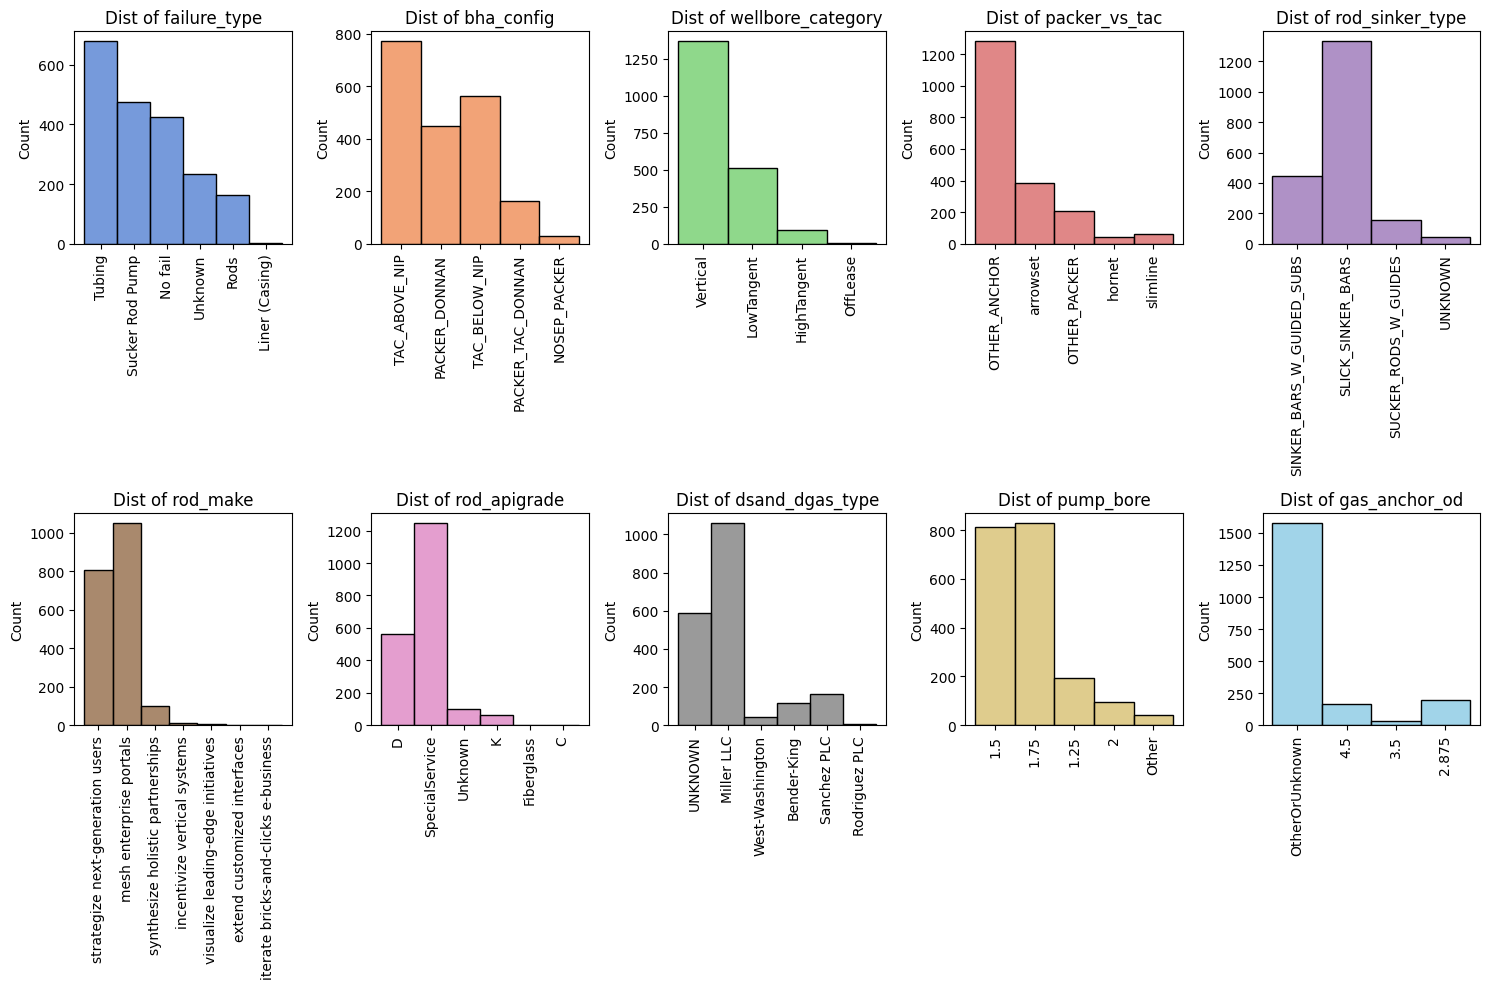

In [6]:
fig, axes = plt.subplots(2, 5, figsize = (15, 10))
axes = axes.flatten()

palette = sns.color_palette("muted", len(df_cat.columns))

for i, col in enumerate(df_cat.columns):
    sns.histplot(df_cat[col], ax=axes[i], bins=20, color=palette[i])
    axes[i].set_title(f'Dist of {col}', fontsize = 12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Count', fontsize = 10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

#### Boolean Distributions

In [7]:
# statistics of boolean variables
df_bool.describe()

,chemgroup1_any,chemgroup1_all,chemgroup2_any,chemgroup2_all,chemgroup3_any,chemgroup3_all,manual_scale,rod_has_guides
count,1977,1977,1977,1977,1977,1977,1977,1977
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False
freq,1056,1810,1481,1799,1835,1917,1698,1305


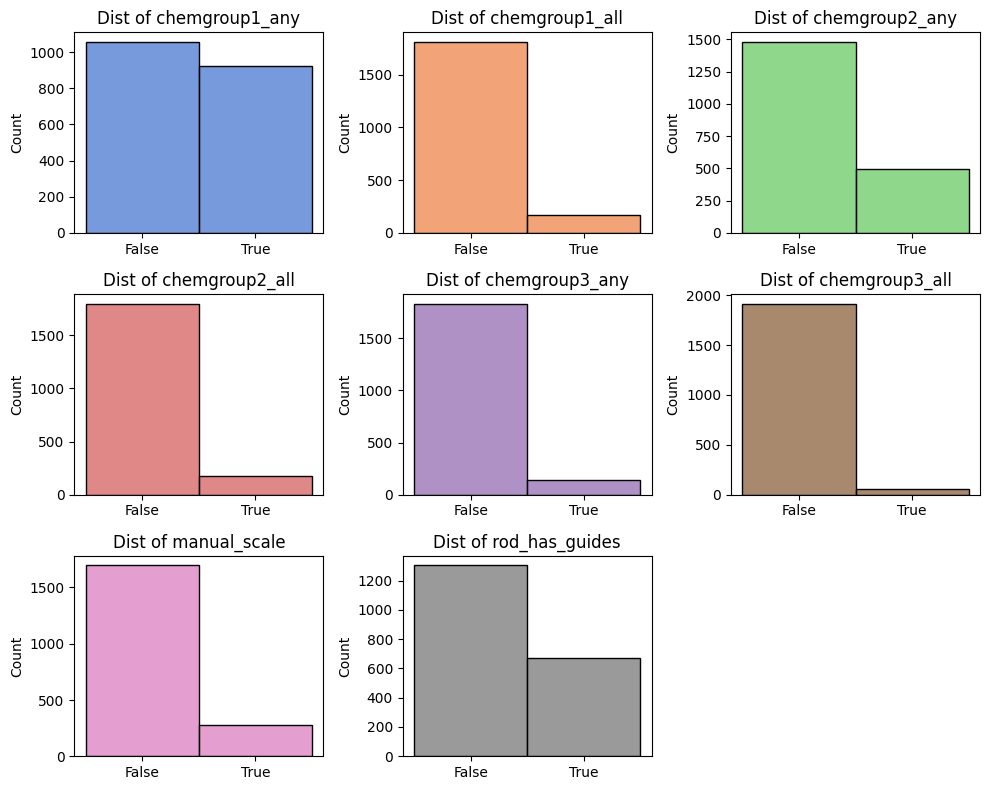

In [8]:
fig, axes = plt.subplots(3, 3, figsize = (10, 8))
axes = axes.flatten()

palette = sns.color_palette("muted", len(df_bool.columns))

for i, col in enumerate(df_bool.columns):
    sns.histplot(df_bool[col], ax=axes[i], color=palette[i], discrete = True)
    axes[i].set_title(f'Dist of {col}', fontsize = 12)
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['False', 'True'])
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Count', fontsize = 10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Descriptions of key variables

### Distribution of Liquid Volume Columns
#### variables: ['avg_oil_vol_log', 'avg_water_vol_log', 'avg_liquid_vol']

Shape: Distribution for avg_oil_vol_log and avg_water_vol_log are both skewed left, however, avg_liquid_vol is skewed right. This suggests that some pumps produce a lot more total liquid than others. Since avg_oil_vol_log and avg_water_vol_log were both logarithmically transformed, the distribution for these two plots suggest the same information

This variable is crucial for understanding production efficiency and could be correlated with well performance and failure rates.

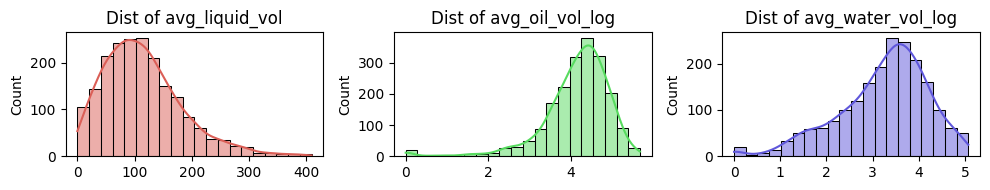

In [9]:
df_vol = df.filter(like="vol", axis=1)
# setting up plot full of subplots
fig, axes = plt.subplots(1, len(df_vol.columns), figsize = (10, 2))
axes = axes.flatten()
# set a nice color palette to make visuals look nice
palette = sns.color_palette("hls", len(df_vol.columns))
# for each column in the dataframe, create a histogram subplot
for i, col in enumerate(df_vol.columns):
    sns.histplot(df_vol[col], kde=True, ax=axes[i], bins=20, color=palette[i])
    axes[i].set_title(f'Dist of {col}', fontsize = 12)
    # make labels readable
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Count', fontsize = 10)
# deletes empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of Pressure Columns
#### variables: ['avg_press_flowline', 'avg_press_tubing', 'avg_press_casing', 'avg_diff_press']

Shape: 
-   The distribution for avg_press_flowline is sharply peaked around a specific value near the lower end, suggesting that most wells have a similar, relatively low flowline pressure.

-   The data shows a narrow distribution, indicating that variations from the common pressure level are rare or minimal.

-   This distribution for avg_diff_press is highly concentrated at a very low differential pressure with almost all the data clustered near zero.

-   The presence of few outliers suggests some wells may experience significantly different pressure conditions, which could be crucial for identifying stress factors or operational anomalies.

-   Similar to the flowline pressure, avg_press_casing also shows a sharp peak at a lower value, indicating a commonality in casing pressures among the majority of the wells.

-   The tail extending to higher values shows that some wells might be subjected to higher casing pressures, which could be an important factor in the operational health and risk of failure.

- avg_press_tubing is right-skewed with peak at lower pressure values and long tail extending towards higher pressures.


Pressure variables are critical for operational safety and efficiency. Abnormally high or low pressures could indicate malfunctioning equipment or suboptimal operating conditions.

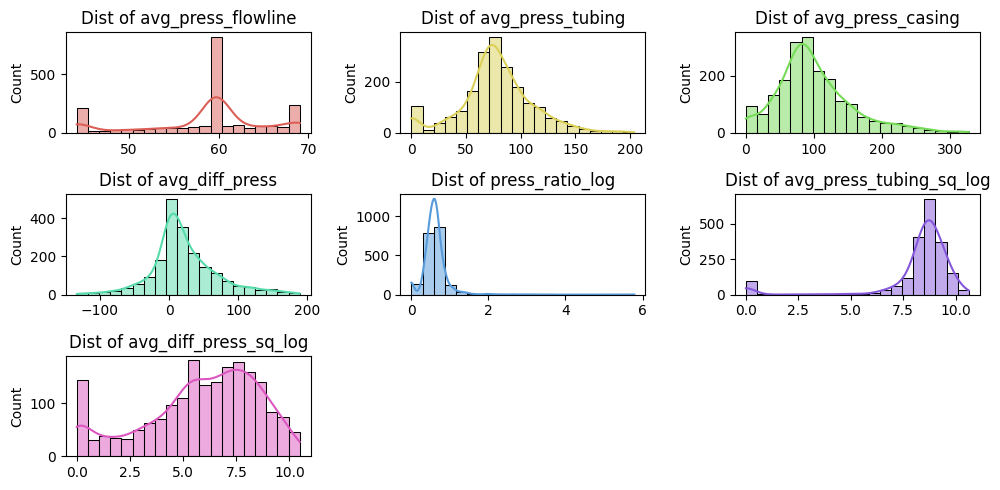

In [10]:
df_press = df.filter(like="press", axis=1)

# setting up plot full of subplots
fig, axes = plt.subplots(3, 3, figsize = (10, 5))
axes = axes.flatten()
# set a nice color palette to make visuals look nice
palette = sns.color_palette("hls", len(df_press.columns))
# for each column in the dataframe, create a histogram subplot
for i, col in enumerate(df_press.columns):
    sns.histplot(df_press[col], kde=True, ax=axes[i], bins=20, color=palette[i])
    axes[i].set_title(f'Dist of {col}', fontsize = 12)
    # make labels readable
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Count', fontsize = 10)
# deletes empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Distribution of Mechanical Columns
#### variables: ['avg_press_flowline', 'avg_press_tubing', 'avg_press_casing', 'avg_diff_press']

Shape:
### Max Unguided DLS (Dog Leg Severity)

- Distribution: Highly concentrated near zero with very few instances extending up to around 50 degrees. The distribution has a sharp peak close to zero.

- Insight: This indicates that most wells have a very low unguided DLS, suggesting either stable drilling conditions or effective avoidance of significant deviations in the majority of wells.

- High values, although rare, might be areas of concern for structural integrity and could potentially influence pump failures.

### Dog Leg Severity High in Hole

- Distribution: Similar to the Max Unguided DLS, most values are near zero, indicating minimal severity in the structure of the wellbore at higher depths.

- Insight: The skew towards lower values suggests good control over the wellbore trajectory during drilling, which could be beneficial for reducing mechanical stresses on the rod pumps. 

- However, the long tail indicates that some wells might still face challenges with significant deviations.

### Gas Anchor Length

- Distribution: The distribution is multi-modal, showing specific common lengths around 5 and 15 units, with a few occurrences around 25 to 30.

- Insight: The specific peaks may represent standard sizes used in operations. Gas anchor lengths are crucial for efficient gas separation and fluid lifting; inappropriate lengths could affect the pump’s operational efficiency and failure rates.

### Max Inclination

- Distribution: Most values are again clustered near zero with a small number of wells showing higher inclinations up to about 20 degrees.

- Insight: This indicates that while most wells maintain a near-vertical orientation, a subset with higher inclinations might be exposed to increased mechanical stresses, potentially contributing to higher failure rates.

### Overall Max Sideload:

-   High sideload values can indicate stress on the rod, potentially leading to failures. Wells with high max sideload should be monitored closely for signs of wear and tear.

### Max Shallow Sideload:

-   Shallow sideloads are less extreme compared to the overall sideloads, which might suggest that issues occurring at shallower depths are generally less severe but more frequent.

### Max Unguided Sideload:

-   Given the rarity of high unguided sideloads, when they do occur, they could be indicative of unusual well conditions or mechanical issues that require immediate attention.



Mechanical stresses and configurations are critical for understanding physical failure mechanisms. In addition, mechanical load factors are directly related to wear and potential failure.

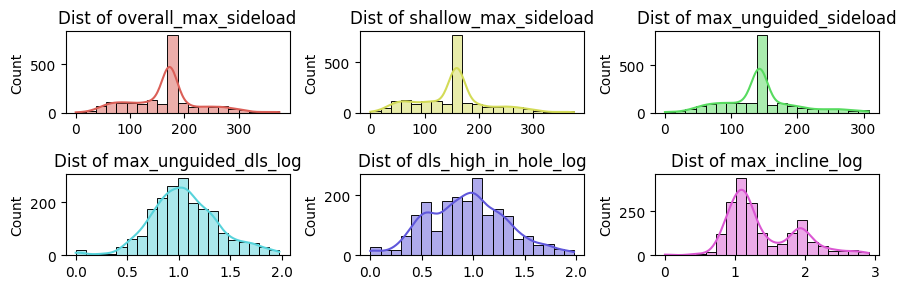

In [11]:
df_mech = df.filter(regex="dls|max", axis=1)

# setting up plot full of subplots
fig, axes = plt.subplots(2, 3, figsize = (9, 3))
axes = axes.flatten()
# set a nice color palette to make visuals look nice
palette = sns.color_palette("hls", len(df_mech.columns))
# for each column in the dataframe, create a histogram subplot
for i, col in enumerate(df_mech.columns):
    sns.histplot(df_mech[col], kde=True, ax=axes[i], bins=20, color=palette[i])
    axes[i].set_title(f'Dist of {col}', fontsize = 12)
    # make labels readable
    axes[i].tick_params(axis='both', which='both', labelsize=10)
    axes[i].set_xlabel('', fontsize = 1)
    axes[i].set_ylabel('Count', fontsize = 10)
# deletes empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation Matrix

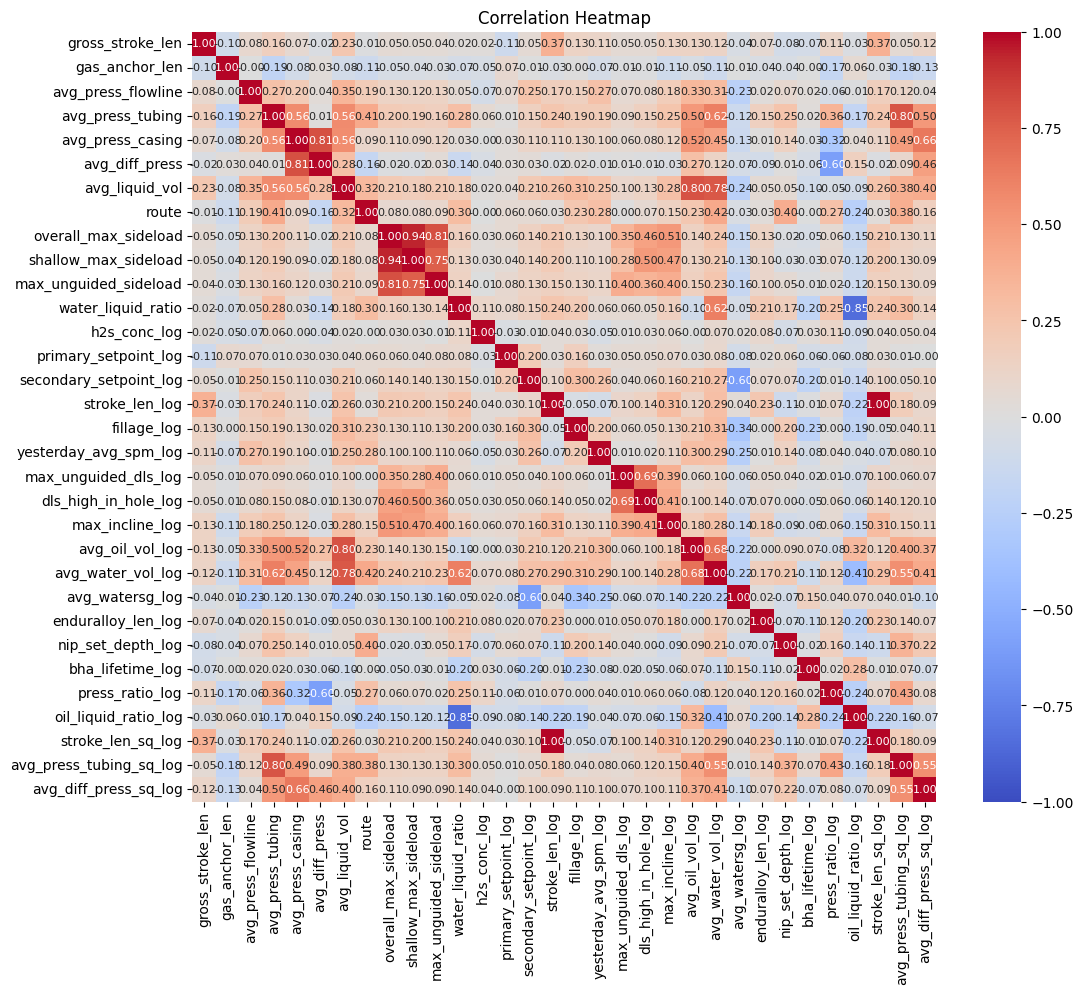

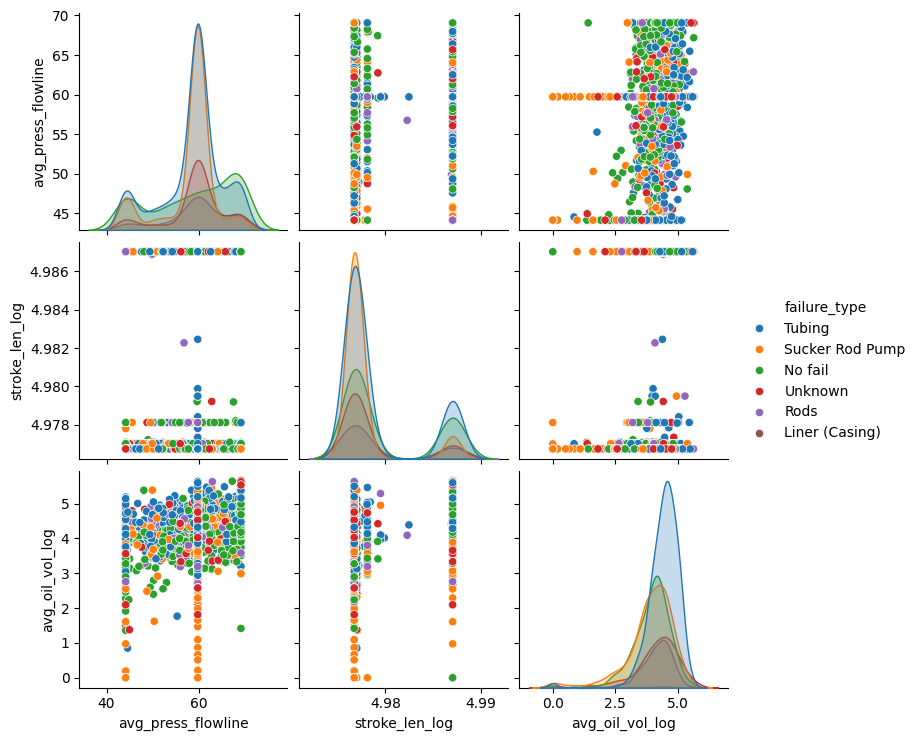

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for key variables
sns.pairplot(df, vars=['avg_press_flowline', 'stroke_len_log', 'avg_oil_vol_log'], hue='failure_type')
plt.show()